In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/MNIST_practice

/content/drive/MyDrive/MNIST_practice


In [37]:
import pandas as pd
import numpy as np

train = pd.read_csv("MNIST/mnist_train.csv")
test = pd.read_csv("MNIST/mnist_test.csv")


In [38]:
print(len(train))
print(train.head(1))

60000
   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  

[1 rows x 785 columns]


(60000, 785)
   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  

[1 rows x 785 columns]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0 

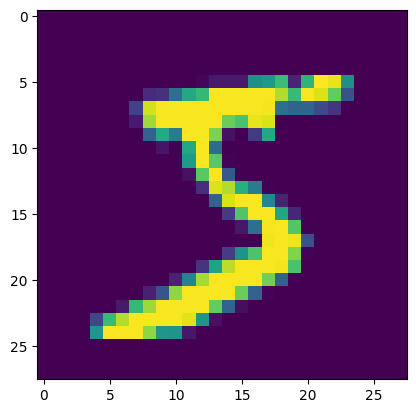

In [39]:
import matplotlib.pyplot as plt

#train = train.drop('label', axis=1)
print(train.shape)
print(train.head(1))
print(train.iloc[0, 1:].values)
plt.imshow(train.iloc[0, 1:].values.reshape(28, 28))


(60000, 784)
   1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  ...  28x19  28x20  \
0    0    0    0    0    0    0    0    0    0     0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  

[1 rows x 784 columns]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   

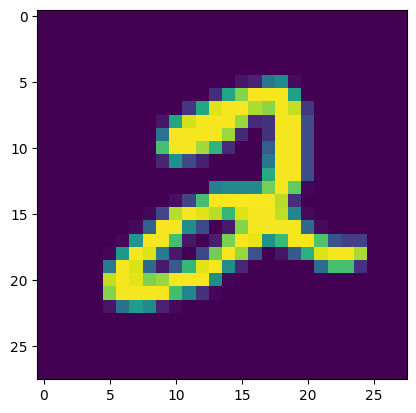

In [40]:
import matplotlib.pyplot as plt

traind = train.drop('label', axis=1)
print(traind.shape)
print(traind.head(1))
print(traind.iloc[0].values)
plt.imshow(traind.iloc[5].values.reshape(28, 28))

In [41]:
type(traind)

pandas.core.frame.DataFrame

In [42]:
print(train.iloc[0:,0])

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: label, Length: 60000, dtype: int64


In [43]:
train_labels = train.iloc[0:,0]
test_labels = test.iloc[0:,0]
train_data = train.iloc[0:,1:]
test_data = test.iloc[0:,1:]

In [44]:
import torch

train_data = torch.tensor(train_data.to_numpy()).float()
train_labels = torch.tensor(train_labels.to_numpy()).long()  # labels are usually long for classification tasks
test_data = torch.tensor(test_data.to_numpy()).float()
test_labels = torch.tensor(test_labels.to_numpy()).long()

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [33]:
class Net(nn.Module):

  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 512),
        nn.ReLU(),
        nn.Linear(512, 254),
        nn.ReLU(),
        nn.Linear(254, 150),
        nn.ReLU(),
        nn.Linear(150, 10),
    )

  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    output = F.log_softmax(logits, dim=1)
    return output


In [22]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [23]:
model = Net().to(device)
print(model)

Net(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=254, bias=True)
    (3): ReLU()
    (4): Linear(in_features=254, out_features=150, bias=True)
    (5): ReLU()
    (6): Linear(in_features=150, out_features=10, bias=True)
  )
)


In [27]:
print(train_data.shape)

torch.Size([60000, 784])


In [46]:
X = train_data[0,:].view(1,28,28)
pred_probab = model(X)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")
print(f"Actual class: {train_labels[0]}")

Predicted class: tensor([9])
Actual class: 5


In [60]:
learning_rate = 1e-3
batch_size = 64
epochs = 5
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

In [52]:
import torch
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
#dataloader
train_dataset = TensorDataset(train_data, train_labels)
test_dataset = TensorDataset(test_data, test_labels)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [53]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# Define the testing loop
def test_loop(dataloader, model, loss_fn):
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [61]:
learning_rate = 1e-3
batch_size = 64
epochs = 10
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()
for epoch in range(epochs):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.121001  [    0/60000]
loss: 0.023506  [ 6400/60000]
loss: 0.036275  [12800/60000]
loss: 0.017593  [19200/60000]
loss: 0.035224  [25600/60000]
loss: 0.012120  [32000/60000]
loss: 0.051604  [38400/60000]
loss: 0.010173  [44800/60000]
loss: 0.016638  [51200/60000]
loss: 0.050330  [57600/60000]
Test Error: 
 Accuracy: 97.0%, Avg loss: 0.094783 

Epoch 2
-------------------------------
loss: 0.026007  [    0/60000]
loss: 0.013788  [ 6400/60000]
loss: 0.019524  [12800/60000]
loss: 0.020223  [19200/60000]
loss: 0.015501  [25600/60000]
loss: 0.065042  [32000/60000]
loss: 0.013645  [38400/60000]
loss: 0.028476  [44800/60000]
loss: 0.033190  [51200/60000]
loss: 0.033175  [57600/60000]
Test Error: 
 Accuracy: 97.2%, Avg loss: 0.090109 

Epoch 3
-------------------------------
loss: 0.027742  [    0/60000]
loss: 0.009672  [ 6400/60000]
loss: 0.062183  [12800/60000]
loss: 0.016380  [19200/60000]
loss: 0.013529  [25600/60000]
loss: 0.013463  [32000/600

In [62]:
X = train_data[0,:].view(1,28,28)
pred_probab = model(X)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred.item()}")
print(f"Actual class: {train_labels[0]}")

Predicted class: 5
Actual class: 5


In [65]:
learning_rate = 1e-4
batch_size = 64
epochs = 10
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()
for epoch in range(epochs):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.003899  [    0/60000]
loss: 0.006878  [ 6400/60000]
loss: 0.019217  [12800/60000]
loss: 0.003643  [19200/60000]
loss: 0.006181  [25600/60000]
loss: 0.010996  [32000/60000]
loss: 0.002389  [38400/60000]
loss: 0.008036  [44800/60000]
loss: 0.003596  [51200/60000]
loss: 0.002374  [57600/60000]
Test Error: 
 Accuracy: 97.6%, Avg loss: 0.085901 

Epoch 2
-------------------------------
loss: 0.003161  [    0/60000]
loss: 0.003578  [ 6400/60000]
loss: 0.002512  [12800/60000]
loss: 0.010120  [19200/60000]
loss: 0.002613  [25600/60000]
loss: 0.007292  [32000/60000]
loss: 0.006431  [38400/60000]
loss: 0.003035  [44800/60000]
loss: 0.011968  [51200/60000]
loss: 0.004176  [57600/60000]
Test Error: 
 Accuracy: 97.5%, Avg loss: 0.085696 

Epoch 3
-------------------------------
loss: 0.003206  [    0/60000]
loss: 0.007400  [ 6400/60000]
loss: 0.005422  [12800/60000]
loss: 0.001556  [19200/60000]
loss: 0.005173  [25600/60000]
loss: 0.002653  [32000/600

In [66]:
X = train_data[0,:].view(1,28,28)
pred_probab = model(X)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred.item()}")
print(f"Actual class: {train_labels[0]}")

Predicted class: 5
Actual class: 5


In [67]:
learning_rate = 1e-3
batch_size = 32
epochs = 10
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()
for epoch in range(epochs):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.006009  [    0/60000]
loss: 0.012039  [ 6400/60000]
loss: 0.001371  [12800/60000]
loss: 0.011131  [19200/60000]
loss: 0.001744  [25600/60000]
loss: 0.005565  [32000/60000]
loss: 0.005533  [38400/60000]
loss: 0.003139  [44800/60000]
loss: 0.012239  [51200/60000]
loss: 0.005299  [57600/60000]
Test Error: 
 Accuracy: 97.5%, Avg loss: 0.087471 

Epoch 2
-------------------------------
loss: 0.018672  [    0/60000]
loss: 0.003564  [ 6400/60000]
loss: 0.002169  [12800/60000]
loss: 0.003051  [19200/60000]
loss: 0.003182  [25600/60000]
loss: 0.010111  [32000/60000]
loss: 0.005246  [38400/60000]
loss: 0.009631  [44800/60000]
loss: 0.006203  [51200/60000]
loss: 0.003117  [57600/60000]
Test Error: 
 Accuracy: 97.6%, Avg loss: 0.087275 

Epoch 3
-------------------------------
loss: 0.002162  [    0/60000]
loss: 0.005631  [ 6400/60000]
loss: 0.005073  [12800/60000]
loss: 0.001991  [19200/60000]
loss: 0.004420  [25600/60000]
loss: 0.011679  [32000/600

In [68]:
X = train_data[0,:].view(1,28,28)
pred_probab = model(X)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred.item()}")
print(f"Actual class: {train_labels[0]}")

Predicted class: 5
Actual class: 5


In [69]:
learning_rate = 1e-3
batch_size = 64
epochs = 15
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()
for epoch in range(epochs):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.005324  [    0/60000]
loss: 0.003678  [ 6400/60000]
loss: 0.004281  [12800/60000]
loss: 0.000748  [19200/60000]
loss: 0.000895  [25600/60000]
loss: 0.001239  [32000/60000]
loss: 0.002513  [38400/60000]
loss: 0.002195  [44800/60000]
loss: 0.003309  [51200/60000]
loss: 0.003901  [57600/60000]
Test Error: 
 Accuracy: 97.6%, Avg loss: 0.088267 

Epoch 2
-------------------------------
loss: 0.004278  [    0/60000]
loss: 0.000980  [ 6400/60000]
loss: 0.001098  [12800/60000]
loss: 0.001934  [19200/60000]
loss: 0.004600  [25600/60000]
loss: 0.003465  [32000/60000]
loss: 0.000521  [38400/60000]
loss: 0.003855  [44800/60000]
loss: 0.004440  [51200/60000]
loss: 0.005258  [57600/60000]
Test Error: 
 Accuracy: 97.6%, Avg loss: 0.088384 

Epoch 3
-------------------------------
loss: 0.002583  [    0/60000]
loss: 0.002379  [ 6400/60000]
loss: 0.002172  [12800/60000]
loss: 0.018514  [19200/60000]
loss: 0.002183  [25600/60000]
loss: 0.004559  [32000/600

In [70]:
X = train_data[0,:].view(1,28,28)
pred_probab = model(X)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred.item()}")
print(f"Actual class: {train_labels[0]}")

Predicted class: 5
Actual class: 5


In [71]:
learning_rate = 1e-3
batch_size = 64
epochs = 5
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()
for epoch in range(epochs):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.001740  [    0/60000]
loss: 0.000777  [ 6400/60000]
loss: 0.000382  [12800/60000]
loss: 0.000842  [19200/60000]
loss: 0.004202  [25600/60000]
loss: 0.000581  [32000/60000]
loss: 0.000725  [38400/60000]
loss: 0.001006  [44800/60000]
loss: 0.001779  [51200/60000]
loss: 0.001658  [57600/60000]
Test Error: 
 Accuracy: 97.6%, Avg loss: 0.091138 

Epoch 2
-------------------------------
loss: 0.002072  [    0/60000]
loss: 0.000705  [ 6400/60000]
loss: 0.002622  [12800/60000]
loss: 0.002219  [19200/60000]
loss: 0.000386  [25600/60000]
loss: 0.001314  [32000/60000]
loss: 0.000276  [38400/60000]
loss: 0.000336  [44800/60000]
loss: 0.000798  [51200/60000]
loss: 0.001355  [57600/60000]
Test Error: 
 Accuracy: 97.6%, Avg loss: 0.091704 

Epoch 3
-------------------------------
loss: 0.002183  [    0/60000]
loss: 0.001305  [ 6400/60000]
loss: 0.000879  [12800/60000]
loss: 0.000860  [19200/60000]
loss: 0.000513  [25600/60000]
loss: 0.001441  [32000/600

In [86]:
X = test_data[0,:].view(1,28,28)
pred_probab = model(X)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred.item()}")
print(f"Actual class: {test_labels[0]}")

Predicted class: 7
Actual class: 7


In [82]:
torch.save(model.state_dict(), 'model_weights.pth')

In [83]:
loaded_model = Net()
loaded_model.load_state_dict(torch.load('model_weights.pth'))
loaded_model.eval()

Net(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=254, bias=True)
    (3): ReLU()
    (4): Linear(in_features=254, out_features=150, bias=True)
    (5): ReLU()
    (6): Linear(in_features=150, out_features=10, bias=True)
  )
)

In [95]:
print("Test Accuracy of loaded model:")
test_loop(test_dataloader, model, loss_fn)
count=0
for i in range(10):
  X = test_data[i,:].view(1,28,28)
  pred_probab = loaded_model(X)
  y_pred = pred_probab.argmax(1)
  print(f"Predicted class: {y_pred.item()}")
  print(f"Actual class: {test_labels[i]}\n")


Test Accuracy of loaded model:
Test Error: 
 Accuracy: 97.6%, Avg loss: 0.092036 

Predicted class: 7
Actual class: 7

Predicted class: 2
Actual class: 2

Predicted class: 1
Actual class: 1

Predicted class: 0
Actual class: 0

Predicted class: 4
Actual class: 4

Predicted class: 1
Actual class: 1

Predicted class: 4
Actual class: 4

Predicted class: 9
Actual class: 9

Predicted class: 6
Actual class: 5

Predicted class: 9
Actual class: 9

